# 20 News groups Dataset

20 Newsgroups Dataset : Text Classification and Clustering


1. Part 1: Text Pre-processing and Embedding Comparison 
   - Preprocessing steps correctly implemented and explained 
   - Comparison of word2vec, GloVe, and OpenAI embeddings
   - Discussion on the embeddings that provide better semantic understanding

2. Part 2: Text Classification Model 
   - Correct implementation of chosen classification model
   - Comprehensive discussion on the choice of model, including its advantages and disadvantages

3. Part 3: Text Clustering Model 
   - Correct implementation of chosen clustering model
   - Comprehensive discussion on the choice of model, including its pros and cons

4. Part 4: Model Evaluation 
   - Appropriate metrics chosen and correctly used to evaluate models
   - Comprehensive discussion on the choice of metrics

5. Part 5: Model Improvement Discussion 
   - Comprehensive discussion on potential improvements, including handling unbalanced data, dealing with slang, abbreviations or typos, and addressing context and word disambiguation challenges

 Dataset Link : http://qwone.com/~jason/20Newsgroups/

### Import required libraries

In [1]:
#!pip install wget
#!pip install nbconvert
import gzip
import tarfile
import pandas as pd
import numpy as np
import wget 
import os
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Set URL and the target directory for dataset download

In [2]:
url = "http://qwone.com/~jason/20Newsgroups/20news-19997.tar.gz"
target_dir= "D:\\MTech in DSE-BITS Pilani\\S2\\AML\\Assignment 1\\"
sample_dir= "D:\\MTech in DSE-BITS Pilani\\S2\\AML\\Assignment 1\\New folder\\"
#sample_dir= target_dir
#The sample directory here has just a copy of 10 categories from the target dir - reduced data set

### Function to Download dataset file from url to target_dir and extract files from the *.tar.gz

In [3]:
def download_dataset(url, target_dir):
    # downloading the data from web
    listing_data = wget.download(url)
    # extracting the files
    tarfile.open(listing_data, "r:gz").extractall(path=target_dir)
    print("\nData set downloaded to local and extracted to "+target_dir+" \n")

### Function to get the dataset from the files

In [4]:
def get_dataset(target_dir):
    
    data=[]
    article_classes=[]

    for subdir, dirs, files in os.walk(target_dir):
        for file in files:
            if file:
                content = open(os.path.join(subdir, file), 'r').read()
                article_class=subdir.rsplit("\\")[-1]
      
                # On checking a few samples from the data set, we know that the header is of no value 
                # in the text classification here. Hence, we will partition the text content in file 
                # to get the main content of the article.
                _header, _blankline, text = content.partition("\n\n")
                data.append([text,article_class,file])

    df1 = pd.DataFrame(data, columns=['Text','ArticleCategory','File'])
    df1.to_csv("D:\\MTech in DSE-BITS Pilani\\S2\\AML\\Assignment 1\\article_body.csv")

    #from IPython.display import display, HTML
    #display(HTML(df.head(10).to_html()))
    
    return df1

### Pre-processing of the file content happens here. 

Preprocessing steps done here:
    
Lowercasing: Converting all tokens to lowercase to ensure consistency.
Removal of Extra Whitespaces: Removing extra spaces or tabs between words.
Removal of Stop Words: Removing common words like "and," "the," "is," etc., as they usually don't carry much meaning.
Removal of Punctuation and Special characters: Removing punctuation marks, special characters, symbols, or non-alphanumeric characters from the text.
Removal of Numeric Characters: Removing numbers or digits from the text.
Tokenization: Splitting the text into individual words or tokens.

Custom preprocessing for the dataset:
Removal of unnecessary references with regular expression (Concluded from some samples on the regular expression to use for the same)
Removal of Email IDs
Removal of URLs
    

In [5]:
def text_preprocessing(InputTextList):
    data=[]
    
    for text in InputTextList:
        #switch whole text to lower case
        text = text.lower()

        #remove quote references- the author's name and the reference is not important
        quote_regex = re.compile(r"(writes in|writes:|wrote:|says:|said:" r"|^from article|^In article|^Quoted from)")
        imp_line="";
        for line in text.split("\n"):
            if not quote_regex.search(line):
                imp_line=imp_line+" "+line

        #remove email ids from the text
        emailregex = re.compile(r'<?([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+>?(\s\([A-Za-z ]*\))?')  
        imp_line = emailregex.sub(' ', imp_line)    

        #remove hyperlinks from the text
        hyperlinkregex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        imp_line = hyperlinkregex.sub('', imp_line)

        #remove punctuations and other symbols from the text
        symbolregex=re.compile(r'[|_,.\"!@#$%^&*(){}?/;`~:<>+=\t-]')
        imp_line = symbolregex.sub(' ', imp_line)   

        #tokenise the text content to words
        tokens = word_tokenize(imp_line)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        
        #removing stop words
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        text= words     
        
        #No need of stemming as we are using pre-trained GloVe model
        #PS = PorterStemmer()
        #text = text.str.split().apply(lambda x: ' '.join([PS.stem(word) for word in x]))

        data.append([text])

    return data
    #display(HTML(df.to_html()))

### Download the files

In [6]:
download_dataset(url, target_dir)

100% [........................................................................] 17332201 / 17332201
Data set downloaded to local and extracted to D:\MTech in DSE-BITS Pilani\S2\AML\Assignment 1\ 



### Read the raw data from the dataset into a dataframe

In [7]:
# get the data set
df1=pd.DataFrame()
df1=get_dataset(sample_dir)

### Clean up the raw data in the dataset by preprocessing

In [8]:
%%time
# Text pre-processing of the text data fetched
cleantext=text_preprocessing(df1['Text'])

Wall time: 13.8 s


### Merge the cleaned data (our corpus) with the target variable (ArticleCategory) - End of preprocessing

In [9]:
df_cleantext=pd.DataFrame(cleantext, columns=['Text'])

df2=pd.DataFrame()
df2=pd.concat((df_cleantext, pd.DataFrame(df1['ArticleCategory'])), axis = 1, join='inner')
df2.head(5)

,Text,ArticleCategory
0,archive name atheism resources alt atheism arc...,alt.atheism
1,archive name atheism introduction alt atheism ...,alt.atheism
2,article well john quite different necessarily ...,alt.atheism
3,recently ras ordered none resisted cared appar...,alt.atheism
4,however hate economic terrorism political corr...,alt.atheism


In [10]:
# See the size of the data representation in dataframe 
print(df2.shape)

(9999, 2)


#### Check if the sample has a fair distribution from all classes

ArticleCategory
alt.atheism                 1000
comp.graphics               1000
comp.os.ms-windows.misc     1000
comp.sys.ibm.pc.hardware    1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball           999
dtype: int64


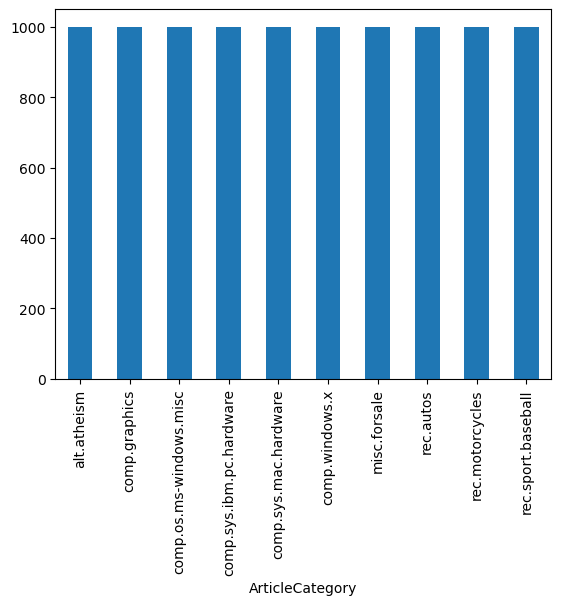

In [11]:
print(df2.groupby('ArticleCategory').size())
 
# Plotting the bar chart
%matplotlib inline
df2.groupby('ArticleCategory').size().plot(kind='bar');

### Preparing count vector for all words in the dataset -- Document Term Matrix

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus = The text data
corpus = df2['Text'].values.tolist()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
 
# Preparing the dataframe for machine learning
# ArticleCategory column -> Target variable 
# Other column -> Predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Target']=df2['ArticleCategory']


In [13]:
# See the size of data representation in Count Vectors
print(CountVectorizedData.shape)
CountVectorizedData.head()

(9999, 60952)


,aa,aaa,aaaa,aaaaa,aaaaagggghhhh,aaaaarrrrgh,aaaahhh,aaahhhh,aaai,aaaread,...,zzx,zzy,zzzoh,zzzz,zzzzzz,zzzzzzt,ªl,ñaustin,ÿhooked,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,alt.atheism


### Word Embedding - GloVe
WORD EMBEDDING TECHNIQUES
Text embedding is a technique to represent a word in a text as an array of numbers, such that words that are similar in meaning have similar array representation.
There are many strategies to text embedding. A few examples are:
1)	Bag of Words
This is a very simple method which converts the words into a flat vector of numbers based on the number of occurrences of each word in the document. It only gives the number of times a word appeared in a document and does not pay importance to their sequential order. Hence it does not help with the meaning or semantics of the data.
2)	TF-IDF (Term Frequency – Inverse Document Frequency) Embedding
Unlike Bag of Words, TF-IDF takes into consideration the occurrence of a word throughout the dataset. Here, the words are represented by a normalized count of each word, where each word count is divided by the number of documents in which it appears:
Total documents: (N)
Documents in which the word appears: (n)
Number of times the word appears in the first sentence: TF
Term Frequency(TF) = 1
Inverse Document Frequency(IDF) = log(N/n)
TF-IDF value = TF * IDF

If a word appears many times in one document and not so much in the entire dataset, it means that the word is of some importance to the document and gets more weightage. If a word appears in many documents and less so in one document, it gets lesser weightage. This is better than Bag of words but still does not take into consideration the sequence of words, or their context.

3)	Word2vec Embedding
Word2Vec is a much more efficient embedding technique that performs better with the meaning and relation between words. Similar words are placed close together in the vector space while dissimilar words are placed far apart. Each word can be represented by a vector of a defined size. Each value in the vector represents a quality of the word.
Word2Vec is also implemented in different ways, some of which are:
a)	Continuous Bag of Words (CBOW): Looks at the words in a context window and predicts the words in between.
b)	Skipgram: Takes a target word and predicts the surrounding context words

4)	FastText:
It is logically similar to Word2Vec but it uses N-gram of words during training. For eg, (Example 3-gram expressions for the word “Windows” -> Win, ind, ndo, dow, ows) If the word “Windows” was in the training dataset, and afterwards we encounter a word, likely a typo “Wndows”. Word2Vec will throw an error in this case that the word is not available, but FastText will return a vector to which “Windows” will closest to.

5)	GloVe (Global Vector) Embedding
Unlike Word2Vec where the occurrence of a word is only checked locally, GloVe considers the global context of words from a corpus to create word embeddings. It uses a Cooccurrence matrix or a count matrix, which is a symmetric matrix that tells how often two words pair together. 


In [14]:
# Defining an empty dictionary to store the values
GloveWordVectors = {}
 
# Reading GloVe Data - Glove representation with 50 features has been already downloaded 
# from https://www.kaggle.com/datasets/anindya2906/glove6b?resource=download&select=glove.6B.50d.txt

with open("D:\\MTech in DSE-BITS Pilani\\S2\\AML\\Assignment 1\\glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], "float")
        GloveWordVectors[word] = vector

In [15]:
# Checking the total number of words present in the GloVe dictionary
len(GloveWordVectors.keys())

400000

In [16]:
# Each word has a numeric representation of 50 numbers.
# Let us see an example
GloveWordVectors['hello'].shape

(50,)

In [17]:
# Pull the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]
 
# First 10 sample words in our document term matrix
WordsVocab[0:10]

Index(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaagggghhhh', 'aaaaarrrrgh', 'aaaahhh',
       'aaahhhh', 'aaai', 'aaaread'],
      dtype='object')

#### Function to convert text to numeric vectors

In [18]:
# Function to convert text to numeric vectors

def Text2Vector(inputText):
    # Converting the text to numeric data
    X = vectorizer.transform(inputText)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Creating empty dataframe to hold each article's vector
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
 
        # initiating an array for an article with all zeros
        Article = np.zeros(50)
 
        # Check if each word in the corpus is present in the GloVe model. 
        # If present, then store it's vector
        for word in WordsVocab[CountVecData.iloc[i, : ]>=1]:
            #print(word)
            if word in GloveWordVectors.keys():    
                Article=Article+GloveWordVectors[word]

        # Appending the sentence to the dataframe
        W2Vec_Data=pd.concat((W2Vec_Data, pd.DataFrame([Article])), axis = 0)
    return(W2Vec_Data)

#### Calling the function to convert all corpus to Glove Vectors

In [19]:
W2Vec_Data=Text2Vector(df2['Text'])
 
# Checking the new representation for text
W2Vec_Data.shape

(9999, 50)

In [20]:
# Comparing the sizes of each representation
print("size of dataset: ", df2.shape)
print("size of count vectorized data or the document term matrix", CountVectorizedData.shape)
print("size of the numeric vector: ", W2Vec_Data.shape)

size of dataset:  (9999, 2)
size of count vectorized data or the document term matrix (9999, 60952)
size of the numeric vector:  (9999, 50)


#### Add the target variable back to the numeric vectors - End of Word Embedding

In [21]:
# Adding the target variable - article category
# 
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Target']=CountVectorizedData['Target']
 
# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,80.516625,130.207824,-96.425175,-178.667775,155.172361,96.350308,-155.546783,-188.074914,-41.395652,77.025824,...,-51.740934,14.354719,154.616848,-25.114383,89.923776,-11.169875,13.851747,-43.558057,-33.237717,alt.atheism
1,257.652638,13.160305,-136.498266,-302.027560,385.496896,208.635462,-58.478756,-73.370206,-92.644133,222.496512,...,-165.470802,83.260347,455.222619,22.786062,35.474024,-141.428848,265.216307,2.117639,22.862008,alt.atheism
2,47.337930,33.693242,-7.681159,-44.532079,91.126963,30.768702,-66.730994,-25.326460,-51.268934,29.084813,...,0.355917,4.062604,69.546506,-15.091762,24.245843,-2.532968,37.223693,-12.026260,9.657615,alt.atheism
3,10.011796,8.053694,-15.133789,-30.921763,35.551324,3.691018,-25.945323,-9.590179,-9.825495,8.940114,...,-1.936923,-18.376001,29.298141,7.597278,12.488842,-8.426378,0.066838,-7.290275,0.817864,alt.atheism
4,1.975186,2.505499,1.501821,-8.270474,0.543314,8.162148,-7.356580,-8.814079,3.623393,-1.022352,...,-7.937634,-0.286769,7.467323,-2.338004,1.578765,-4.322522,6.353964,-1.419404,3.987888,alt.atheism


#### Set the target variable and predictors - being generic with the column indices

In [22]:
# Set the target variable and predictors being generic with the column indices
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values


### Normalize the feature values - We use Min Max Normalization here

In [23]:
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

### Split the dataset into training and testing datasets

In [24]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Check the sample sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6999, 50)
(6999,)
(3000, 50)
(3000,)


### Text Classification - Logistic Regression - using predefined model
The logistic regression classifier uses the weighted combination of the input features and passes them through a sigmoid function. Sigmoid function transforms any real number input, to a number between 0 and 1.

The advantages of using Logistic Regression for text classification are:
- It does not require high computation power.
- It is easy to implement.
- It provides probability score for observation.

The disadvantages are:
- It cannot handle a large number of features and variables.
- Logistic regression is prone to overfitting.
- It does not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

In [25]:
#### Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l1', solver='saga')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Category']=y_test
TestingData['Predicted_Category']=prediction
print(TestingData.head())


          0         1         2         3         4         5         6  \
0  0.423406  0.330980  0.255946  0.632836  0.578588  0.716708  0.334333   
1  0.459548  0.335468  0.284344  0.634599  0.576968  0.701581  0.329706   
2  0.446837  0.320985  0.284221  0.623405  0.585751  0.713343  0.324532   
3  0.446351  0.348559  0.292244  0.640671  0.580435  0.711459  0.334388   
4  0.427446  0.386746  0.238264  0.618312  0.594626  0.725466  0.294242   

          7         8         9  ...        42        43        44        45  \
0  0.792446  0.524167  0.211648  ...  0.531168  0.100308  0.773506  0.429095   
1  0.785433  0.508134  0.237610  ...  0.501998  0.120832  0.765749  0.463244   
2  0.811555  0.504563  0.222941  ...  0.507170  0.119370  0.750445  0.436897   
3  0.785953  0.510208  0.252456  ...  0.511669  0.099036  0.753916  0.456165   
4  0.781338  0.444131  0.245533  ...  0.530575  0.130053  0.769443  0.497675   

         46        47        48        49            Category  \
0  

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### -----Model Evaluation-----

In [27]:

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.90      0.85       302
           comp.graphics       0.43      0.41      0.42       306
 comp.os.ms-windows.misc       0.42      0.32      0.37       292
comp.sys.ibm.pc.hardware       0.42      0.40      0.41       283
   comp.sys.mac.hardware       0.42      0.21      0.28       310
          comp.windows.x       0.41      0.44      0.42       295
            misc.forsale       0.48      0.71      0.57       331
               rec.autos       0.65      0.69      0.67       269
         rec.motorcycles       0.65      0.72      0.68       310
      rec.sport.baseball       0.92      0.87      0.90       302

                accuracy                           0.57      3000
               macro avg       0.56      0.57      0.56      3000
            weighted avg       0.56      0.57      0.56      3000

[[272  18   3   0   7   8   3   8  14   8]
 [  4 124  23  18  24  77  12 

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 


Accuracy values for 10-fold Cross Validation:
 [0.56451367 0.55473027 0.54042951 0.57620529 0.51524476 0.56807482
 0.55851857 0.57477783 0.54862634 0.55699932]

Final Average Accuracy of the model: 0.56


C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
###### K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

#Printing all the parameters of KNN
print(clf)

#Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

#Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

#Running 10-Fold Cross validation on a given algorithm
#Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsClassifier()


C:\Users\shali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                          precision    recall  f1-score   support

             alt.atheism       0.77      0.89      0.82       302
           comp.graphics       0.40      0.45      0.43       306
 comp.os.ms-windows.misc       0.35      0.43      0.38       292
comp.sys.ibm.pc.hardware       0.32      0.45      0.38       283
   comp.sys.mac.hardware       0.38      0.34      0.35       310
          comp.windows.x       0.40      0.35      0.37       295
            misc.forsale       0.65      0.50      0.56       331
               rec.autos       0.67      0.65      0.66       269
         rec.motorcycles       0.73      0.49      0.59       310
      rec.sport.baseball       0.87      0.85      0.86       302

                accuracy                           0.54      3000
               macro avg       0.55      0.54      0.54      3000
            weighted avg       0.56      0.54      0.54      3000

[[268   5   0   4   3   7   3   5   5   2]
 [ 15 138  42  33  23  35  12 

C:\Users\shali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Accuracy values for 10-fold Cross Validation:
 [0.50460166 0.50966025 0.5380755  0.53356082 0.48707187 0.53171581
 0.5540921  0.56378949 0.52751992 0.5244035 ]

Final Average Accuracy of the model: 0.53


C:\Users\shali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Fit the the data on the model that performs better

In [29]:
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
FinalModel=clf.fit(X,y)

### Using the model for predictions

In [38]:
# Defining a function which converts words into numeric vectors for prediction
def FunctionPredictLabel(NewArticle):
    
    # Generating the Glove word vector embeddings
    X= text_preprocessing(NewArticle)
    X= Text2Vector(X)
    #print(X)
    
    # If standardization/normalization was done on training
    # then the above X must also be converted to same platform
    # Generating the normalized values of X
    X=PredictorScalerFit.transform(X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction=FinalModel.predict(X)
    Result=pd.DataFrame(data=NewArticle, columns=['Text'])
    Result['Prediction']=Prediction
    return(Result)

In [ ]:
# Calling the function
NewArticle="The Honda CBF Stunner is an efficient and stylish bike that is sure to turn heads. It boasts a powerful 124.7cc engine and a top speed of 98 kmph. It is fuel-efficient and has an impressive mileage of 57 kmpl. Its impressive features include an Anti-Lock braking system for better safety, a digital speedometer for convenience, and an easy-to-use self-start feature. The Honda CBF Stunner has a stylish design and comes in a range of eye-catching colours. It offers great value for money and is perfect for those looking for a reliable and stylish bike."#,"Schanuel’s stat line might be the only one to rival Crews’, a hilarious .447/.615/.868 with 71 walks against just 14 strikeouts. He’s done so in Conference USA, not the SEC, so he hasn’t faced the same caliber of arms, and he’s limited to first base, which seriously dents his draft stock, as does a mediocre performance hitting on the Cape last summer. He can hammer a fastball, even at good velocity, and rarely whiffs on heaters or chases anything out of the zone. He starts with his hands high above his head, except with two strikes, when he starts a little closer to the helmet, but it’s mostly just for show as he gets his hands into position in time. Otherwise, it’s a simple approach, and his hands and hips work very well together for solid contact … but it’s not elite contact quality or huge raw power, which might indicate there’s a lower ceiling for the bat. If he could play anywhere else, he’d probably sneak into the top half of the round."]
FunctionPredictLabel(NewArticle)

#### Text Clustering Using KMeans

In [ ]:
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score

X = X_train
cluster_results_km = pd.DataFrame({'K': range(6, 25), 'SIL': np.nan})
cluster_results_km.set_index('K', inplace=True)
for k in tqdm(cluster_results_km.index):
    km_model = KMeans(n_clusters = k, init ='k-means++', random_state = 42)
    y = km_model.fit_predict(X)
    cluster_results_km.loc[k, 'SIL'] = silhouette_score(X, y)
    
cluster_results_km.idxmax(), cluster_results_km.max()

### Model Improvement Discussion

- The dataset we had to start with had a good balance of samples from all classes. If that was not the case, we should have had to synthesize some data to create enough samples for each class.

- When we look at the count vectorised data, there are a lot of slangs and typos as well. This poor data quality in turn affects the quality of the model.

- Due to the limitations in computational power, the sample taken was just half of the dataset, which means it was trained on less than half of the real dataset. With a better training, we could have improved the chances of better predictions with the model